In [7]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
basketball = pd.read_csv("../data/jalen_brunson.csv")
# Display the first few rows of the dataset
basketball.head()
basketball.info()
basketball.describe()
basketball.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          82 non-null     float64
 1   Gcar        65 non-null     float64
 2   Gtm         82 non-null     float64
 3   Date        82 non-null     object 
 4   Team        82 non-null     object 
 5   Unnamed: 5  41 non-null     object 
 6   Opp         82 non-null     object 
 7   Result      83 non-null     object 
 8   GS          83 non-null     object 
 9   MP          83 non-null     object 
 10  FG          83 non-null     object 
 11  FGA         83 non-null     object 
 12  FG%         83 non-null     object 
 13  3P          83 non-null     object 
 14  3PA         83 non-null     object 
 15  3P%         83 non-null     object 
 16  2P          83 non-null     object 
 17  2PA         83 non-null     object 
 18  2P%         83 non-null     object 
 19  eFG%        83 non-null     obj

(83, 34)

In [ ]:
##Drop the rows for columns that have "Inactive" or "Did Not Dress".
inactive = basketball['2P'] == "Inactive"
no_dress = basketball['2P'] == "Did Not Dress"

basketball_data_cleaned = basketball.drop(basketball[inactive | no_dress].index)

print(basketball_data_cleaned.shape)
basketball_data_cleaned.tail(5)

(66, 34)


,Rk,Gcar,Gtm,Date,Team,Unnamed: 5,Opp,Result,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
77,62.0,484.0,78.0,2025-04-06,NYK,NaN,PHO,W 112-98,1,34:27,...,2,2,6,1,0,3,2,15,11.1,9
78,63.0,485.0,79.0,2025-04-08,NYK,NaN,BOS,L 117-119 (OT),1,38:26,...,1,1,10,0,0,2,1,27,21.2,-2
79,64.0,486.0,80.0,2025-04-10,NYK,@,DET,L 106-115,1,29:17,...,0,2,5,0,2,3,2,15,7.8,-11
80,65.0,487.0,81.0,2025-04-11,NYK,NaN,CLE,L 102-108,1,36:17,...,1,1,2,1,0,3,1,27,17.6,-6
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40-25,65,2301,...,160,187,475,60,8,164,138,1690,20.0,146


In [9]:
# Remove the row that sums up all the statistics 

basketball_data_cleaned2 = basketball_data_cleaned.iloc[:-1 , :]

print(basketball_data_cleaned2.shape)

basketball_data_cleaned2.tail(5)

(65, 34)


,Rk,Gcar,Gtm,Date,Team,Unnamed: 5,Opp,Result,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
61,61.0,483.0,62.0,2025-03-06,NYK,@,LAL,L 109-113 (OT),1,41:11,...,4,4,10,0,0,3,2,39,30.0,-8
77,62.0,484.0,78.0,2025-04-06,NYK,NaN,PHO,W 112-98,1,34:27,...,2,2,6,1,0,3,2,15,11.1,9
78,63.0,485.0,79.0,2025-04-08,NYK,NaN,BOS,L 117-119 (OT),1,38:26,...,1,1,10,0,0,2,1,27,21.2,-2
79,64.0,486.0,80.0,2025-04-10,NYK,@,DET,L 106-115,1,29:17,...,0,2,5,0,2,3,2,15,7.8,-11
80,65.0,487.0,81.0,2025-04-11,NYK,NaN,CLE,L 102-108,1,36:17,...,1,1,2,1,0,3,1,27,17.6,-6


In [24]:
# Drop the columns that are not needed for analysis
basketball_data_cleaned2 = basketball_data_cleaned2.reset_index(drop=True)
print(basketball_data_cleaned2.shape)
basketball_data_cleaned2.tail(5)

(65, 37)


,Rk,Gcar,Gtm,Date,Team,Unnamed: 5,Opp,Result,GS,MP,...,STL,BLK,TOV,PF,PTS,GmSc,+/-,Outcome,Score,Minutes
60,61.0,483.0,62.0,2025-03-06,NYK,@,LAL,L 109-113 (OT),1,41:11,...,0,0,3,2,39,30.0,-8,L,109-113 (OT),41
61,62.0,484.0,78.0,2025-04-06,NYK,NaN,PHO,W 112-98,1,34:27,...,1,0,3,2,15,11.1,9,W,112-98,34
62,63.0,485.0,79.0,2025-04-08,NYK,NaN,BOS,L 117-119 (OT),1,38:26,...,0,0,2,1,27,21.2,-2,L,117-119 (OT),38
63,64.0,486.0,80.0,2025-04-10,NYK,@,DET,L 106-115,1,29:17,...,0,2,3,2,15,7.8,-11,L,106-115,29
64,65.0,487.0,81.0,2025-04-11,NYK,NaN,CLE,L 102-108,1,36:17,...,1,0,3,1,27,17.6,-6,L,102-108,36


In [11]:
basketball_data_cleaned2.describe()

,Rk,Gcar,Gtm
count,65.00000,65.00000,65.000000
mean,33.00000,455.00000,34.415385
std,18.90767,18.90767,21.109012
min,1.00000,423.00000,1.000000
25%,17.00000,439.00000,17.000000
50%,33.00000,455.00000,33.000000
75%,49.00000,471.00000,50.000000
max,65.00000,487.00000,81.000000


In [ ]:
#convert column data types to numeric
print(basketball_data_cleaned2["Result"])
print(basketball_data_cleaned2["MP"])
basketball_data_cleaned2[["PTS"]]


basketball_data_cleaned2["MP"] = basketball_data_cleaned2["MP"]
basketball_data_cleaned2.describe()

0          L 109-132
1           W 123-98
2          L 104-110
3          W 116-107
4           W 128-98
           ...      
60    L 109-113 (OT)
61          W 112-98
62    L 117-119 (OT)
63         L 106-115
64         L 102-108
Name: Result, Length: 65, dtype: object
0     24:30
1     29:55
2     37:36
3     36:22
4     30:40
      ...  
60    41:11
61    34:27
62    38:26
63    29:17
64    36:17
Name: MP, Length: 65, dtype: object


,Rk,Gcar,Gtm
count,65.00000,65.00000,65.000000
mean,33.00000,455.00000,34.415385
std,18.90767,18.90767,21.109012
min,1.00000,423.00000,1.000000
25%,17.00000,439.00000,17.000000
50%,33.00000,455.00000,33.000000
75%,49.00000,471.00000,50.000000
max,65.00000,487.00000,81.000000


In [ ]:
# Conert the "Result" column to string
basketball_data_cleaned2[["Outcome", "Score"]] = basketball_data_cleaned2['Result'].str.split(' ', n=1, expand=True)

basketball_data_cleaned2["Outcome"]

0     L
1     W
2     L
3     W
4     W
     ..
60    L
61    W
62    L
63    L
64    L
Name: Outcome, Length: 65, dtype: object

In [22]:
# Convert the "Minutes" column to integer type
basketball_data_cleaned2["Minutes"] = basketball_data_cleaned2["MP"].str[:2]
basketball_data_cleaned2["Minutes"] = basketball_data_cleaned2["Minutes"].astype(int)
print(basketball_data_cleaned2["Minutes"])

0     24
1     29
2     37
3     36
4     30
      ..
60    41
61    34
62    38
63    29
64    36
Name: Minutes, Length: 65, dtype: int64


In [26]:
# Group the data by "Outcome" and calculate the mean and STD of "Minutes"

basketball_data_cleaned2.groupby("Outcome")["Minutes"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
L,25.0,35.96,4.476606,24.0,35.00,36.0,39.00,43.0
W,40.0,34.20,5.174890,22.0,30.75,35.0,37.25,45.0


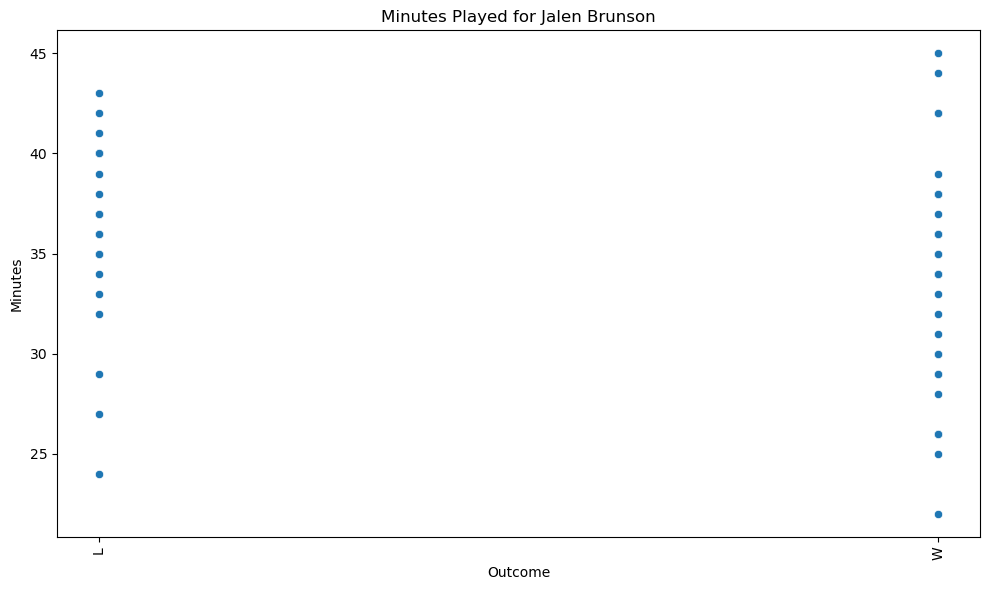

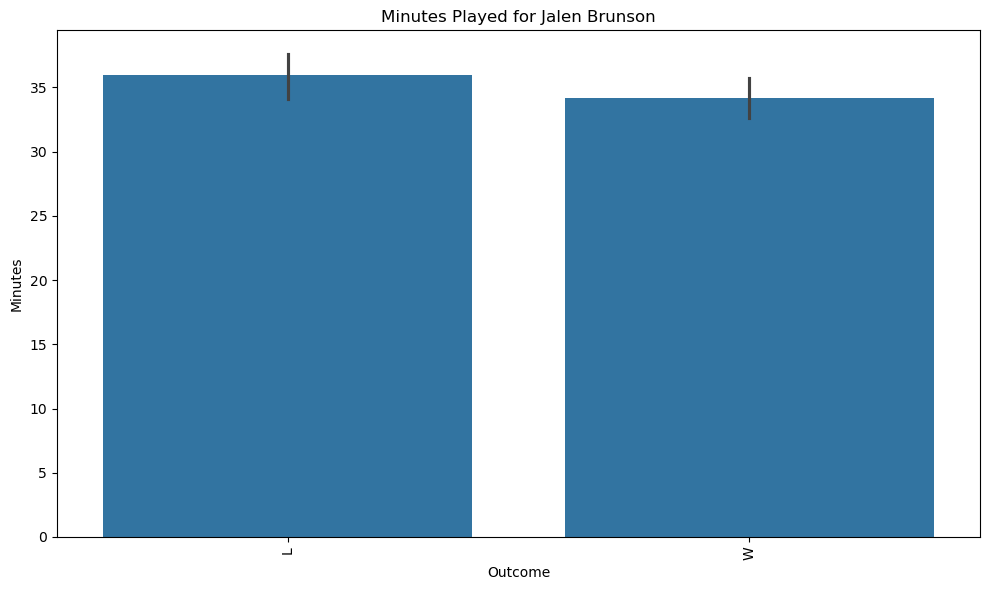

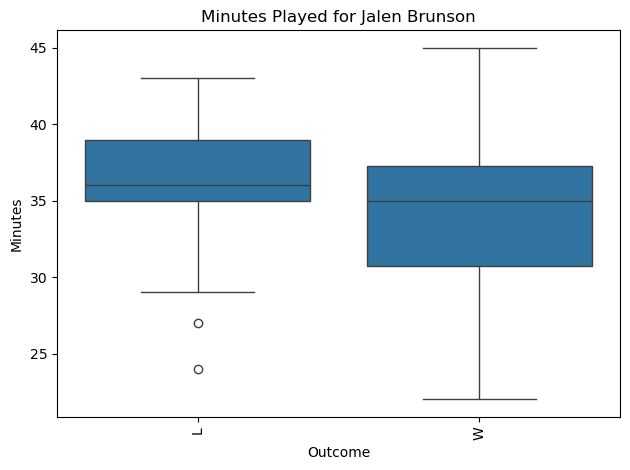

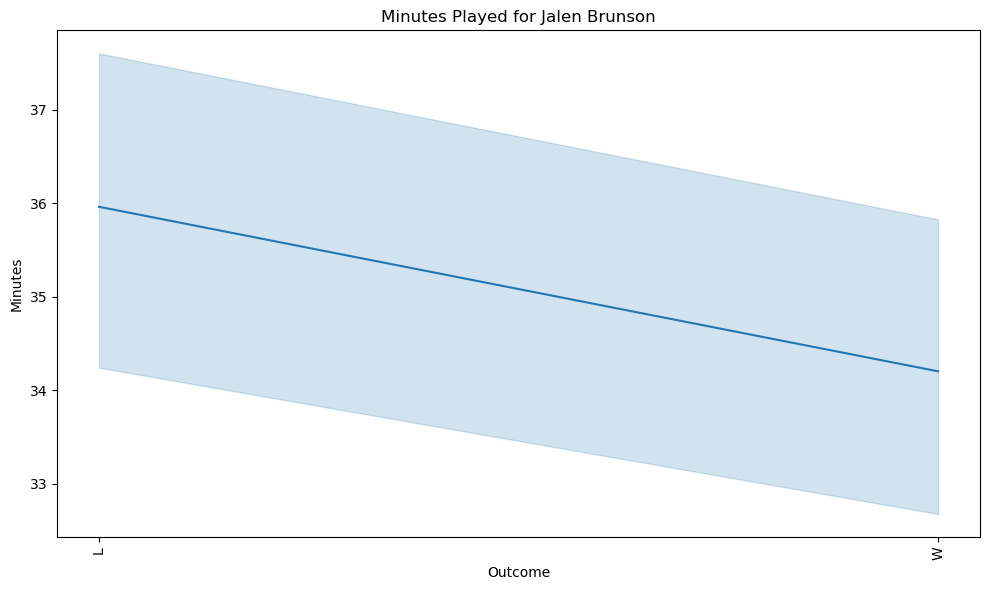

In [21]:
# Create a scatter plot of the number of minutes played for Jalen Brunson
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Outcome', y='Minutes', data=basketball_data_cleaned2)
plt.title('Minutes Played for Jalen Brunson')
plt.xlabel('Outcome')
plt.ylabel('Minutes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
# Create a Bar plot of the number of minutes played for Jalen Brunson
plt.figure(figsize=(10, 6))
sns.barplot(x='Outcome', y='Minutes', data=basketball_data_cleaned2)
plt.title('Minutes Played for Jalen Brunson')
plt.xlabel('Outcome')
plt.ylabel('Minutes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Create a Box plot of the number of Minutes for Jalen Brunson
sns.boxplot(x='Outcome', y='Minutes', data=basketball_data_cleaned2)
plt.title('Minutes Played for Jalen Brunson')
plt.xlabel('Outcome')
plt.ylabel('Minutes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Create a line plot of the number of minutes played for Jalen Brunson
plt.figure(figsize=(10, 6))
sns.lineplot(x='Outcome', y='Minutes', data=basketball_data_cleaned2)
plt.title('Minutes Played for Jalen Brunson')
plt.xlabel('Outcome')
plt.ylabel('Minutes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Reflection Question:

Is there a relationship between Brunson’s play time (minutes) and the Knicks winning?  
Yes, there is a thinly dispersed negative correlation relationship between Brunson's play time (minutes) and the Knicks winning. The more minutes he plays, the more likely the Knicks are to lose and the less he plays, he is likely to win. This is evident from the data and graph correlation which shows that when Brunson plays more minutes, the Knicks tend to win and lose at the different time frequency. For example, the minutes and mean is slightly 1.76 precentage away from three distribution making it a slightly normal bell curve. There is correlation that shows one variable increases and the other variable decreases lightly. It is not constant for losing and winning for minutes in games. For example, for loses is 2 minutes apart from the winning stream making the variable 24 to 22. 